In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preparing Data

In [3]:
# read data
data = pd.read_excel(r'/content/drive/MyDrive/TA (1)/Processing Data/Data/raw data/data_after_cleansing.xlsx',sheet_name="Baron")
data

,Date,Hours,Hs [m],Angin [m/s]
0,2014-07-14 07:56:00,1,2.060,3.618206
1,2014-07-14 08:56:00,2,2.326,3.325107
2,2014-07-14 09:56:00,3,2.280,3.218061
3,2014-07-14 10:56:00,4,2.280,2.976261
4,2014-07-14 11:56:00,5,2.326,2.594406
...,...,...,...,...
1256,2014-09-04 15:56:00,1257,1.098,0.853453
1257,2014-09-04 16:56:00,1258,1.044,0.119597
1258,2014-09-04 17:56:00,1259,1.098,0.681651
1259,2014-09-04 18:56:00,1260,0.966,1.093551


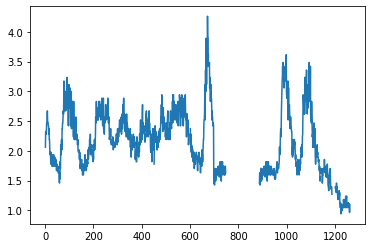

In [4]:
# plotting raw data
plt.plot(data['Hours'],data['Hs [m]'])
plt.show()

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Hs [m]'],
                    mode='lines')
)

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [8]:
import copy
data_raw = copy.deepcopy(data)

### handling outliers

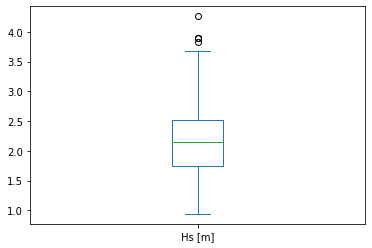

In [ ]:
data['Hs [m]'].plot(kind='box', sharex=False, sharey=False)
plt.show()

In [ ]:
# calculate q1, q3, iqr 
q1 = data['Hs [m]'].quantile(0.25)
q3 = data['Hs [m]'].quantile(0.75)
iqr = q3 - q1

In [ ]:
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ]

665    3.891
666    3.820
671    4.260
672    3.891
673    3.891
Name: Hs [m], dtype: float64

In [ ]:
# outlier atas
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ] = np.nan

#outlier bawah
data['Hs [m]'].loc[(data['Hs [m]']< q1-(1.5*iqr)) & (data['Hs [m]']>= q1-(3*iqr)) ] = np.nan

# nilai ekstrim bawah
data['Hs [m]'].loc[data['Hs [m]']> q3 + (3*iqr) ] = np.nan

# nilai ekstrim atas
data['Hs [m]'].loc[data['Hs [m]']< q1 - (3*iqr) ] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data.head()

,Date,Hours,Hs [m],Angin [m/s]
0,2014-07-14 07:56:00,1,2.060,3.618206
1,2014-07-14 08:56:00,2,2.326,3.325107
2,2014-07-14 09:56:00,3,2.280,3.218061
3,2014-07-14 10:56:00,4,2.280,2.976261
4,2014-07-14 11:56:00,5,2.326,2.594406


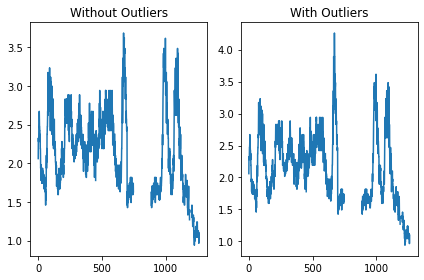

In [ ]:
plt.subplot(121)
plt.plot(data['Hs [m]'])
plt.title('Without Outliers')

plt.subplot(122)
plt.plot(data_raw['Hs [m]'])
plt.title('With Outliers')

plt.tight_layout()

### Interpolation

In [9]:
# import library
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [10]:
# define other dataframe for interpolate 
data2 = copy.deepcopy(data)
data3 = copy.deepcopy(data)
data4 = copy.deepcopy(data)

In [11]:
# drop NaN value in dataframe data
data = data.dropna()

In [12]:
# cubic interpolation
y_fc=interp1d(data['Hours'],data['Hs [m]'], kind='cubic')

In [13]:
# quadratic interpolation
y_fq=interp1d(data['Hours'],data['Hs [m]'], kind='quadratic')

In [14]:
y_fc=CubicSpline(data['Hours'],data['Hs [m]'],extrapolate=True)

In [15]:
# linear interpolation
y_fl=interp1d(data['Hours'],data['Hs [m]'], kind='linear')

In [16]:
# interpolate using function we define before
import math

for i in data2['Hours'] :
  if math.isnan(data2['Hs [m]'][i-1])== True:
    data2['Hs [m]'][i-1] = y_fc(i)
    data3['Hs [m]'][i-1] = y_fq(i)
    data4['Hs [m]'][i-1] = y_fl(i)
  else:
    pass
#data.loc[data['Hs [m]'].isna()]

<ipython-input-16-86623d2f7eed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-86623d2f7eed>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-86623d2f7eed>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



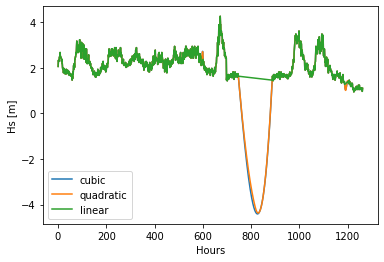

In [17]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
plt.plot(data3['Hours'],data3['Hs [m]'], label ='quadratic')
plt.plot(data4['Hours'],data4['Hs [m]'], label ='linear')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

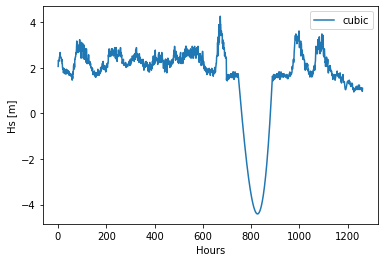

In [18]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data4['Date'], y=data4['Hs [m]'], name="Hs"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data4['Date'], y=data4['Angin [m/s]'], name="Wind"),
    secondary_y=True,
)

# Add figure title
# fig.update_layout(
#     title_text="Double Y Axis Example"
# )

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b><i>Hs</i> [m]</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>Wind [m/s]</b> ", secondary_y=True)

fig.update_layout( font_size = 14,
                    legend=dict(
                        yanchor="top",
                        y=0.99,
                        xanchor="left",
                        x=0.01,
                        font_size=10)
                    
                    ,
                    yaxis_range=[0,5])
fig.show()

In [ ]:
# plotting wind and wave
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(data4['Hours'],
        data4['Hs [m]'],
        color="red", 
        )
# set x-axis label
ax.set_xlabel("Hours", fontsize = 14)
# set y-axis label
ax.set_ylabel("Hs [m]",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data4['Hours'],
        data4['Angin [m/s]'],color="blue")
ax2.set_ylabel("Wind Speed [m/s]",color="blue",fontsize=14)
plt.show()

karena data tidak berdistribusi normal -> ada skew nya (positif) makanya buat scaling data pake -> Normalize Data

In [ ]:
from scipy.stats import pearsonr
corr1, _ = pearsonr(data2['Hs [m]'][886:],data2['Angin [m/s]'][886:])
corr2, _ = pearsonr(data2['Hs [m]'][:746],data2['Angin [m/s]'][:746])
(corr1+corr2)/2

### splitting data

In [ ]:
hs = data4['Hs [m]']

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 4
X1, y1 = df_to_X_y(hs, WINDOW_SIZE)
X1.shape, y1.shape

((1257, 4, 1), (1257,))

# split into train and test sets
train = values[:746, :]
val = values[886:886+126 , :]
test = values[886+126:, :]

In [ ]:
X_train1, y_train1 = X1[:746], y1[:746]
X_val1, y_val1 = X1[886:1012], y1[886:1012]
X_test1, y_test1 = X1[1012:], y1[1012:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((746, 4, 1), (746,), (126, 4, 1), (126,), (245, 4, 1), (245,))

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((4, 1)))
model1.add(LSTM(100, activation='relu'))
model1.add(RepeatVector(1))
model1.add(LSTM(100, activation='relu', return_sequences=True))
model1.add(TimeDistributed(Dense(100, activation='relu')))
model1.add(TimeDistributed(Dense(1)))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 100)           0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 1, 100)            80400     
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 100)           10100     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 1)             101       
 tributed)                                                       
                                                      

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
18/24 [=====================>........] - ETA: 0s - loss: 5.2914 - root_mean_squared_error: 2.3003

24/24 [==============================] - 9s 253ms/step - loss: 5.2832 - root_mean_squared_error: 2.2985 - val_loss: 4.7155 - val_root_mean_squared_error: 2.1577
Epoch 2/100
23/24 [===========================>..] - ETA: 0s - loss: 5.0924 - root_mean_squared_error: 2.2566

24/24 [==============================] - 5s 216ms/step - loss: 5.1080 - root_mean_squared_error: 2.2577 - val_loss: 4.5452 - val_root_mean_squared_error: 2.1184
Epoch 3/100
23/24 [===========================>..] - ETA: 0s - loss: 4.8873 - root_mean_squared_error: 2.2107

24/24 [==============================] - 4s 179ms/step - loss: 4.8891 - root_mean_squared_error: 2.2109 - val_loss: 4.2917 - val_root_mean_squared_error: 2.0585
Epoch 4/100
20/24 [========================>.....] - ETA: 0s - loss: 4.5682 - root_mean_squared_error: 2.1373

24/24 [==============================] - 6s 253ms/step - loss: 4.5326 - root_mean_squared_error: 2.1294 - val_loss: 3.8589 - val_root_mean_squared_error: 1.9521
Epoch 5/100
22/24 [==========================>...] - ETA: 0s - loss: 3.9366 - root_mean_squared_error: 1.9841

24/24 [==============================] - 4s 183ms/step - loss: 3.9046 - root_mean_squared_error: 1.9772 - val_loss: 3.0489 - val_root_mean_squared_error: 1.7361
Epoch 6/100
22/24 [==========================>...] - ETA: 0s - loss: 2.7826 - root_mean_squared_error: 1.6681

24/24 [==============================] - 4s 177ms/step - loss: 2.7300 - root_mean_squared_error: 1.6555 - val_loss: 1.5539 - val_root_mean_squared_error: 1.2432
Epoch 7/100
22/24 [==========================>...] - ETA: 0s - loss: 1.1222 - root_mean_squared_error: 1.0593

24/24 [==============================] - 6s 270ms/step - loss: 1.1061 - root_mean_squared_error: 1.0542 - val_loss: 0.5888 - val_root_mean_squared_error: 0.7663
Epoch 8/100
20/24 [========================>.....] - ETA: 0s - loss: 0.6938 - root_mean_squared_error: 0.8329

24/24 [==============================] - 4s 182ms/step - loss: 0.6730 - root_mean_squared_error: 0.8207 - val_loss: 0.5193 - val_root_mean_squared_error: 0.7215
Epoch 9/100
20/24 [========================>.....] - ETA: 0s - loss: 0.6202 - root_mean_squared_error: 0.7876

24/24 [==============================] - 6s 243ms/step - loss: 0.6361 - root_mean_squared_error: 0.7962 - val_loss: 0.4840 - val_root_mean_squared_error: 0.6963
Epoch 10/100
21/24 [=========================>....] - ETA: 0s - loss: 0.6057 - root_mean_squared_error: 0.7783

24/24 [==============================] - 5s 197ms/step - loss: 0.5921 - root_mean_squared_error: 0.7708 - val_loss: 0.4538 - val_root_mean_squared_error: 0.6742
Epoch 11/100
22/24 [==========================>...] - ETA: 0s - loss: 0.5763 - root_mean_squared_error: 0.7591

24/24 [==============================] - 5s 212ms/step - loss: 0.5689 - root_mean_squared_error: 0.7544 - val_loss: 0.4216 - val_root_mean_squared_error: 0.6500
Epoch 12/100
20/24 [========================>.....] - ETA: 0s - loss: 0.5463 - root_mean_squared_error: 0.7391

24/24 [==============================] - 5s 224ms/step - loss: 0.5370 - root_mean_squared_error: 0.7340 - val_loss: 0.3957 - val_root_mean_squared_error: 0.6297
Epoch 13/100
24/24 [==============================] - ETA: 0s - loss: 0.5188 - root_mean_squared_error: 0.7211

24/24 [==============================] - 5s 233ms/step - loss: 0.5188 - root_mean_squared_error: 0.7211 - val_loss: 0.3692 - val_root_mean_squared_error: 0.6084
Epoch 14/100
22/24 [==========================>...] - ETA: 0s - loss: 0.4937 - root_mean_squared_error: 0.7027

24/24 [==============================] - 4s 177ms/step - loss: 0.4918 - root_mean_squared_error: 0.6985 - val_loss: 0.3495 - val_root_mean_squared_error: 0.5917
Epoch 15/100
22/24 [==========================>...] - ETA: 0s - loss: 0.4544 - root_mean_squared_error: 0.6741

24/24 [==============================] - 6s 268ms/step - loss: 0.4693 - root_mean_squared_error: 0.6853 - val_loss: 0.3252 - val_root_mean_squared_error: 0.5711
Epoch 16/100
22/24 [==========================>...] - ETA: 0s - loss: 0.4563 - root_mean_squared_error: 0.6755

24/24 [==============================] - 4s 181ms/step - loss: 0.4487 - root_mean_squared_error: 0.6720 - val_loss: 0.3076 - val_root_mean_squared_error: 0.5553
Epoch 17/100
20/24 [========================>.....] - ETA: 0s - loss: 0.4325 - root_mean_squared_error: 0.6576

24/24 [==============================] - 4s 176ms/step - loss: 0.4289 - root_mean_squared_error: 0.6550 - val_loss: 0.2902 - val_root_mean_squared_error: 0.5394
Epoch 18/100
21/24 [=========================>....] - ETA: 0s - loss: 0.4217 - root_mean_squared_error: 0.6494

24/24 [==============================] - 6s 267ms/step - loss: 0.4207 - root_mean_squared_error: 0.6477 - val_loss: 0.2750 - val_root_mean_squared_error: 0.5253
Epoch 19/100
24/24 [==============================] - ETA: 0s - loss: 0.3960 - root_mean_squared_error: 0.6304

24/24 [==============================] - 4s 182ms/step - loss: 0.3960 - root_mean_squared_error: 0.6304 - val_loss: 0.2619 - val_root_mean_squared_error: 0.5125
Epoch 20/100
21/24 [=========================>....] - ETA: 0s - loss: 0.3860 - root_mean_squared_error: 0.6213

24/24 [==============================] - 5s 205ms/step - loss: 0.3790 - root_mean_squared_error: 0.6151 - val_loss: 0.2500 - val_root_mean_squared_error: 0.5008
Epoch 21/100
21/24 [=========================>....] - ETA: 0s - loss: 0.3612 - root_mean_squared_error: 0.6010

24/24 [==============================] - 5s 228ms/step - loss: 0.3726 - root_mean_squared_error: 0.6072 - val_loss: 0.2395 - val_root_mean_squared_error: 0.4902
Epoch 22/100
20/24 [========================>.....] - ETA: 0s - loss: 0.3704 - root_mean_squared_error: 0.6086

24/24 [==============================] - 5s 207ms/step - loss: 0.3571 - root_mean_squared_error: 0.5980 - val_loss: 0.2298 - val_root_mean_squared_error: 0.4802
Epoch 23/100
20/24 [========================>.....] - ETA: 0s - loss: 0.3519 - root_mean_squared_error: 0.5932

24/24 [==============================] - 5s 197ms/step - loss: 0.3488 - root_mean_squared_error: 0.5921 - val_loss: 0.2215 - val_root_mean_squared_error: 0.4715
Epoch 24/100
21/24 [=========================>....] - ETA: 0s - loss: 0.3329 - root_mean_squared_error: 0.5770

24/24 [==============================] - 5s 223ms/step - loss: 0.3350 - root_mean_squared_error: 0.5797 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4639
Epoch 25/100
21/24 [=========================>....] - ETA: 0s - loss: 0.3332 - root_mean_squared_error: 0.5773

24/24 [==============================] - 5s 224ms/step - loss: 0.3209 - root_mean_squared_error: 0.5680 - val_loss: 0.2083 - val_root_mean_squared_error: 0.4571
Epoch 26/100
21/24 [=========================>....] - ETA: 0s - loss: 0.3235 - root_mean_squared_error: 0.5688

24/24 [==============================] - 5s 212ms/step - loss: 0.3165 - root_mean_squared_error: 0.5634 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4521
Epoch 27/100
24/24 [==============================] - ETA: 0s - loss: 0.2992 - root_mean_squared_error: 0.5484

24/24 [==============================] - 5s 232ms/step - loss: 0.2992 - root_mean_squared_error: 0.5484 - val_loss: 0.1989 - val_root_mean_squared_error: 0.4467
Epoch 28/100
21/24 [=========================>....] - ETA: 0s - loss: 0.2973 - root_mean_squared_error: 0.5452

24/24 [==============================] - 4s 179ms/step - loss: 0.2945 - root_mean_squared_error: 0.5409 - val_loss: 0.1960 - val_root_mean_squared_error: 0.4433
Epoch 29/100
21/24 [=========================>....] - ETA: 0s - loss: 0.2892 - root_mean_squared_error: 0.5378

24/24 [==============================] - 6s 259ms/step - loss: 0.2863 - root_mean_squared_error: 0.5367 - val_loss: 0.1933 - val_root_mean_squared_error: 0.4402
Epoch 30/100
24/24 [==============================] - ETA: 0s - loss: 0.2774 - root_mean_squared_error: 0.5269

24/24 [==============================] - 4s 188ms/step - loss: 0.2774 - root_mean_squared_error: 0.5269 - val_loss: 0.1921 - val_root_mean_squared_error: 0.4388
Epoch 31/100
19/24 [======================>.......] - ETA: 0s - loss: 0.2544 - root_mean_squared_error: 0.5044

24/24 [==============================] - 5s 209ms/step - loss: 0.2657 - root_mean_squared_error: 0.5143 - val_loss: 0.1914 - val_root_mean_squared_error: 0.4379
Epoch 32/100
21/24 [=========================>....] - ETA: 0s - loss: 0.2638 - root_mean_squared_error: 0.5136

24/24 [==============================] - 6s 240ms/step - loss: 0.2630 - root_mean_squared_error: 0.5122 - val_loss: 0.1911 - val_root_mean_squared_error: 0.4376
Epoch 33/100
24/24 [==============================] - 0s 12ms/step - loss: 0.2532 - root_mean_squared_error: 0.5041 - val_loss: 0.1921 - val_root_mean_squared_error: 0.4386
Epoch 34/100
24/24 [==============================] - 0s 12ms/step - loss: 0.2484 - root_mean_squared_error: 0.4988 - val_loss: 0.1947 - val_root_mean_squared_error: 0.4413
Epoch 35/100
24/24 [==============================] - 0s 11ms/step - loss: 0.2442 - root_mean_squared_error: 0.4946 - val_loss: 0.1959 - val_root_mean_squared_error: 0.4428
Epoch 36/100
24/24 [==============================] - 0s 11ms/step - loss: 0.2377 - root_mean_squared_error: 0.4890 - val_loss: 0.2000 - val_root_mean_squared_error: 0.4470
Epoch 37/100
24/24 [==============================] - 0s 11ms/step - loss: 0.2347 - root_mean_squared_error: 0.4852 - val_loss: 0.2031 - val_root_m

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Univariate':train_predictions, 'Actuals':y_train1})
train_results

24/24 [==============================] - 0s 4ms/step


,Univariate,Actuals
0,2.186685,2.326000
1,2.244851,2.469000
2,2.257988,2.469000
3,2.289173,2.519000
4,2.333342,2.671000
...,...,...
741,1.797428,1.741000
742,1.814519,1.631000
743,1.812715,1.629771
744,1.828499,1.628543


In [ ]:
train_results['Date'] = data2['Date'].iloc[:746]
train_results.head()

,Univariate,Actuals,Date
0,2.186685,2.326,2014-07-14 07:56:00
1,2.244851,2.469,2014-07-14 08:56:00
2,2.257988,2.469,2014-07-14 09:56:00
3,2.289173,2.519,2014-07-14 10:56:00
4,2.333342,2.671,2014-07-14 11:56:00


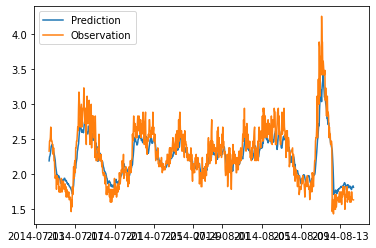

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Date'],train_results['Univariate'], label ='Prediction')
plt.plot(train_results['Date'],train_results['Actuals'], label='Observation')
plt.legend(loc='best')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Training'))
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Univariate':val_predictions, 'Actuals':y_val1})
val_results.head()

4/4 [==============================] - 0s 7ms/step


,Univariate,Actuals
0,1.704372,1.5950
1,1.734478,1.6310
2,1.723552,1.7030
3,1.732430,1.5975
4,1.781354,1.4920


In [ ]:
val_results['Date'] = data2['Date'].iloc[886:886+126].values
val_results.head()

,Univariate,Actuals,Date
0,1.704372,1.5950,2014-08-20 05:56:00
1,1.734478,1.6310,2014-08-20 06:56:00
2,1.723552,1.7030,2014-08-20 07:56:00
3,1.732430,1.5975,2014-08-20 08:56:00
4,1.781354,1.4920,2014-08-20 09:56:00


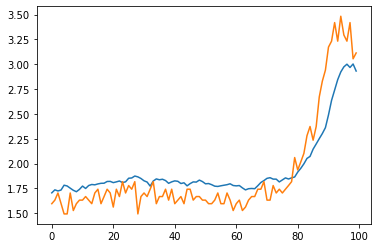

In [ ]:
plt.plot(val_results['Univariate'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Validation'))
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Univariate':test_predictions, 'Actuals':y_test1})
test_results.head()

8/8 [==============================] - 0s 6ms/step


,Univariate,Actuals
0,2.350654,2.519
1,2.369737,2.421
2,2.394520,2.373
3,2.375523,2.326
4,2.331698,2.326


In [ ]:
test_results['Date'] = data2['Date'].iloc[886+126:round(len(data2))-4].values
test_results.head()

,Univariate,Actuals,Date
0,2.350654,2.519,2014-08-25 11:56:00
1,2.369737,2.421,2014-08-25 12:56:00
2,2.394520,2.373,2014-08-25 13:56:00
3,2.375523,2.326,2014-08-25 14:56:00
4,2.331698,2.326,2014-08-25 15:56:00


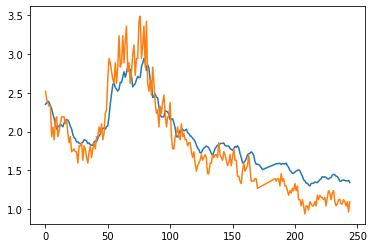

In [ ]:
plt.plot(test_results['Univariate'])
plt.plot(test_results['Actuals'])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Testing'))
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.2504365372597494

### verif


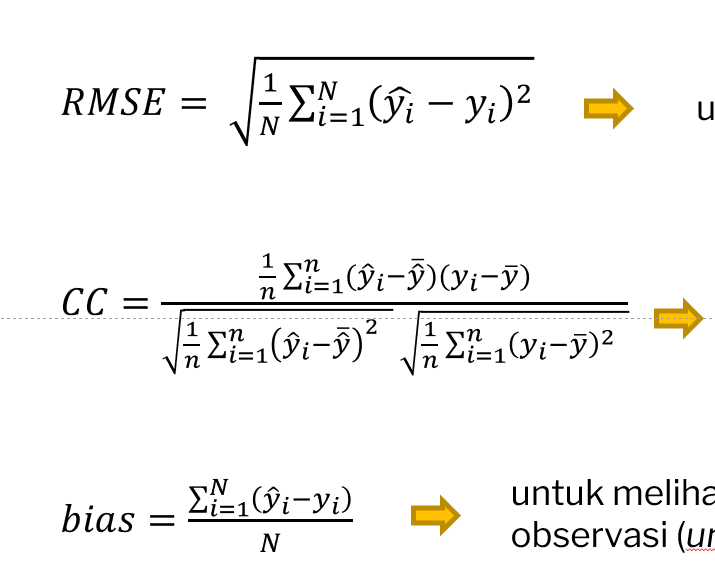

In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.2504365372597494

In [ ]:
# coefficiect correlation 
mean_pred = test_results['Univariate'].mean()
mean_obv = test_results['Actuals'].mean()
atas = 0
a_sum = 0
b_sum = 0
for i in range(len(test_results['Actuals'])):
  a = test_results['Univariate'][i] - mean_pred
  b = test_results['Actuals'][i] - mean_obv
  c = a*b
  atas +=c
  a_sqr = a**2
  b_sqr = b**2
  a_sum += a_sqr
  b_sum += b_sqr
 
print(atas, a_sum, b_sum)
konst = 1/len(test_results['Actuals'])
cc = konst* atas / ((konst*a_sum)**0.5) * ((konst*b_sum)**0.5)
cc

59.38529145317124 43.51660401186702 88.27807999591847


0.34523256046108736

In [ ]:
konst

0.004081632653061225

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(test_results['Actuals'],test_results['Univariate'])
corr

0.9581311387479058

In [ ]:
# bias 
gap_sum = 0
for j in range(len(test_results['Actuals'])):
  gap = test_results['Univariate'][j] - test_results['Actuals'][j]
  gap_sum += gap

bias = gap_sum/len(test_results['Actuals'])
bias

0.09776943726053047

### convert dataframe to csv

In [ ]:
train_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_train_lstm_baron.csv')
val_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_val_lstm_baron.csv')
test_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_test_lstm_baron.csv')